# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how = 'left', on = "Mouse ID")


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study["Mouse ID"].unique())
print(number_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_study.loc[mouse_study['Mouse ID'] == "g989", :]
print(duplicate_rows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study['Mouse ID'].isin(duplicates)==False]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse = len(clean_mouse_study["Mouse ID"].unique())
print(clean_mouse)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Mean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).mean()
Median = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).median()
Variance = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).var()
Standard_deviation = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).std()
SEM = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).sem()

summary_statisicts = pd.DataFrame({"Mean Tumor Volume": Mean, "Median Tumor Volume": Median, "Variance Tumor Volume": Variance, "St.Dev Tumor Volume": Standard_deviation, "St.Err Tumoe Volume": SEM})

summary_statisicts








,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,St.Dev Tumor Volume,St.Err Tumoe Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug')

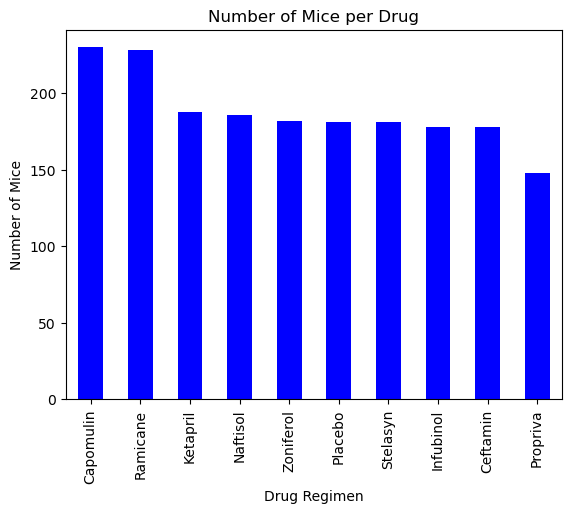

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
per_regimen = clean_mouse_study["Drug Regimen"].value_counts()
plot_bar = per_regimen.plot.bar(color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug")

Text(0.5, 1.0, 'Number of Mice per Drug')

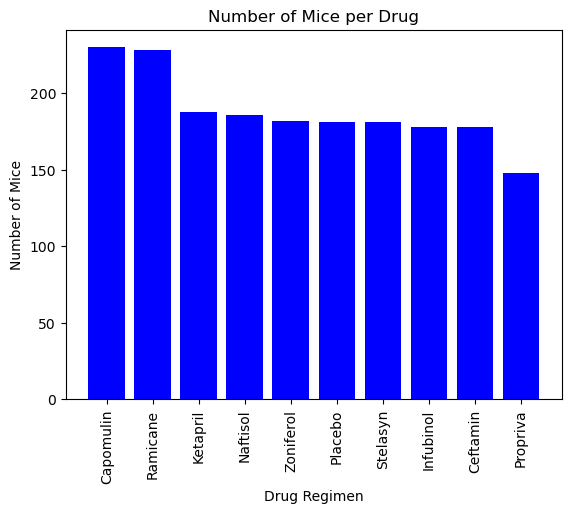

In [10]:
### Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_mouse_study['Drug Regimen'].value_counts()

plt.bar(counts.index.values,counts.values, color= 'b')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug")


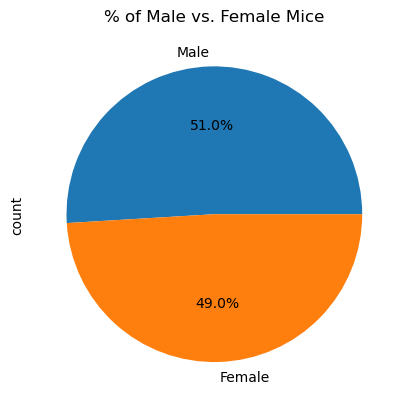

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_mouse_study['Sex'].value_counts()

sex.plot.pie(autopct= "%1.1f%%")
plt.title("% of Male vs. Female Mice")
plt.show()

Text(0.5, 1.0, '% of Male vs. Female Mice')

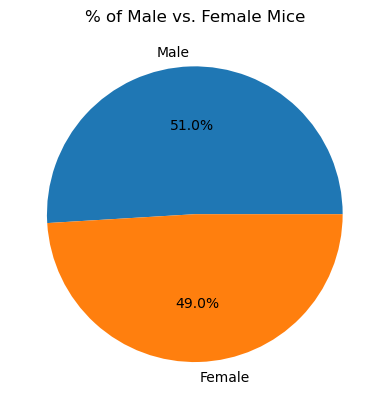

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_mouse_study['Sex'].value_counts()
labels= 'Male', 'Female'
fig, ax = plt.subplots()
ax.pie(sex, labels=labels, autopct= "%1.1f%%")
plt.title("% of Male vs. Female Mice")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_tumor = clean_mouse_study.loc[clean_mouse_study["Tumor Volume (mm3)"] == "Capomulin"]
Ramicane_tumor = clean_mouse_study.loc[clean_mouse_study["Tumor Volume (mm3)"] == "Ramicane"]
Infubinol_tumor = clean_mouse_study.loc[clean_mouse_study["Tumor Volume (mm3)"] == "Infubinol"]
Ceftamin_tumor = clean_mouse_study.loc[clean_mouse_study["Tumor Volume (mm3)"] == "Ceftamin"]
#print(Capomulin_tumor,Ramicane_tumor,Infubinol_tumor,Ceftamin_tumor)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= clean_mouse_study.groupby(["Mouse ID"])["Timepoint"].max()
#print(last_timepoint)
last_timepoint = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_time_list = last_timepoint.merge(clean_mouse_study,on = ["Mouse ID","Timepoint"], how = "left")
print(merged_time_list)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_time_list.loc[merged_time_list["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # add subset
    
    # Determine outliers using upper and lower bounds
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    outliers = final_tumor_volume.loc[(final_tumor_volume< lower_bound)|(final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


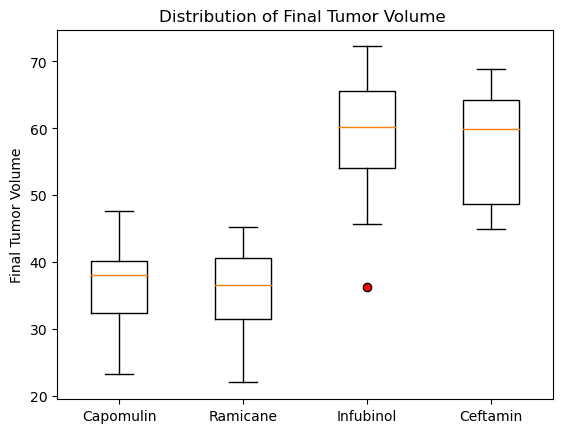

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
colour = dict(markerfacecolor = "r")
plt.boxplot(tumor_vol_data, labels = treatments,flierprops = colour)
plt.ylabel('Final Tumor Volume')
plt.title('Distribution of Final Tumor Volume ')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 's185 Tumor Volume when Treated with Capomulin')

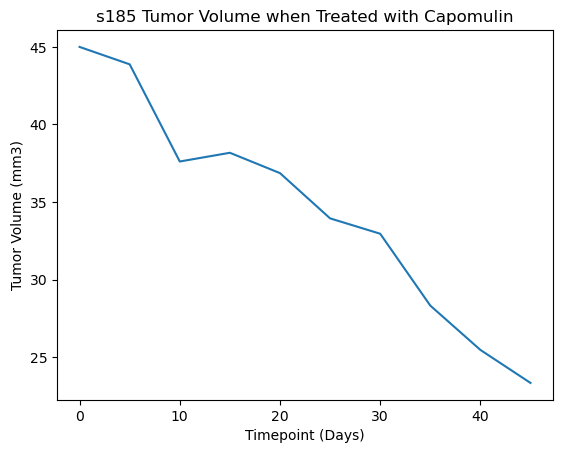

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_treatment = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
unique = Capomulin_treatment["Mouse ID"].unique()
#print(unique)
selected_mouse_data = Capomulin_treatment.loc[clean_mouse_study["Mouse ID"] == "s185"]
#print(selected_mouse_data)
plt.plot(selected_mouse_data["Timepoint"],selected_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("s185 Tumor Volume when Treated with Capomulin")


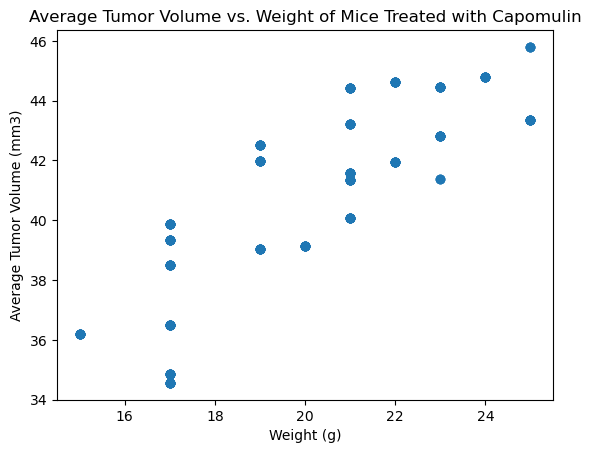

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_treatment = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
avg_tumor_size = Capomulin_treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#print(avg_tumor_size)
Capolmulin_weight_data = pd.merge(avg_tumor_size, Capomulin_treatment, on="Mouse ID", how= "left")
#print(Capolmulin_weight_data)
plt.scatter(Capolmulin_weight_data["Weight (g)"], Capolmulin_weight_data["Tumor Volume (mm3)_x"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight of Mice Treated with Capomulin")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


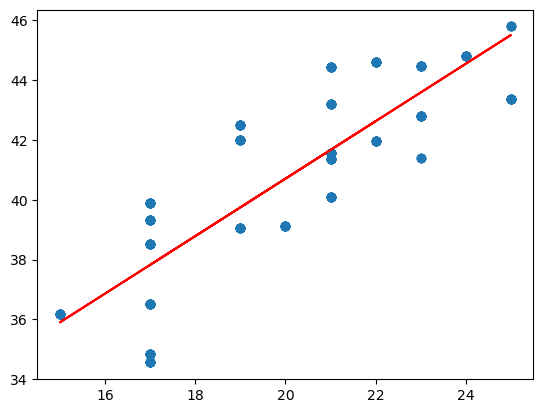

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Weight = Capolmulin_weight_data["Weight (g)"]
Tumor_volume = Capolmulin_weight_data["Tumor Volume (mm3)_x"]
correlation = st.pearsonr(Weight, Tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}" )

plt.scatter(Weight,Tumor_volume)
slope, intercept, rvalue, pvalue, stderr = st.linregress(Weight,Tumor_volume)
x = Capolmulin_weight_data["Weight (g)"]
plt.plot(x, slope*x + intercept, color = "r")
plt.title("Correlation between mouse weight and the average tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Voume (mm3)")